# Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# TODO: Agregar las librerías que hagan falta
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Carga de datos y división en entrenamiento y evaluación

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [55]:
#dataset = pd.read_csv("./IntroduccionAprendizajeAutomatico-master/data/loan_data.csv", comment="#")
dataset = pd.read_csv("loan_data.csv", comment="#")

# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
* El departamento de créditos de un banco quiere automatizar la toma de decisiones para la aprobación de líneas de crédito con garantía hipotecaria. El conjunto de datos son los datos recopilados de los solicitantes recientes a los que se les otorgó crédito a través de el proceso actual de suscripción de préstamos. Contiene información sobre 1854 préstamos.
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
* Hay que predecir una variable de tipo categorica que nos indica si el prestamo se pago al dia o no (1 = cliente incumplido en el préstamo - 0 = préstamo reembolsado). Tiene valor 1 en 309 casos (16.6%)
3. ¿Qué información (atributos) hay disponible para hacer la predicción?

Para cada solicitante se registraron 10 variables de entrada.
* LOAN: Monto de la solicitud de préstamo
* MORTDUE: Monto adeudado de la hipoteca existente
* VALUE: Valor de la propiedad actual
* YOJ: Años en el trabajo actual
* DEROG: Número de informes derogatorios importantes
* DELINQ: Número de líneas de crédito morosas
* CLAGE: Antigüedad de la línea comercial más antigua en meses
* NINQ: Número de líneas de crédito recientes
* CLNO: Número de líneas de crédito
* DEBTINC: Relación deuda-ingresos

4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?
* DEBTINC, LOAN, DELINQ

**No hace falta escribir código para responder estas preguntas.**

## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

In [56]:
clf = SGDClassifier(random_state= 100, max_iter = 1000 )
scaler = StandardScaler()
X_train_1 = scaler.fit_transform(X_train)
X_test_1 = scaler.transform(X_test)

In [57]:
clf.fit(X_train_1, y_train)

SGDClassifier(random_state=100)

In [58]:
y_pred_1 = clf.predict(X_train_1)
cr = classification_report(y_train, y_pred_1)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.98      0.93      1232
           1       0.80      0.30      0.43       251

    accuracy                           0.87      1483
   macro avg       0.84      0.64      0.68      1483
weighted avg       0.86      0.87      0.84      1483



In [59]:
cm = confusion_matrix(y_train, y_pred_1)
print(cm)

[[1213   19]
 [ 176   75]]


In [60]:
y_pred_2 = clf.predict(X_test_1)
cr = classification_report(y_test, y_pred_2)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       313
           1       0.85      0.29      0.44        58

    accuracy                           0.88       371
   macro avg       0.87      0.64      0.68       371
weighted avg       0.88      0.88      0.86       371



In [61]:
cm = confusion_matrix(y_test, y_pred_2)
print(cm)

[[310   3]
 [ 41  17]]


### Ejercicio 2.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [62]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [63]:
print('Valores a probar:')
alpha_values = list(np.logspace(-5, 1, 7))
print('alpha:', alpha_values)
eta0_values = list(np.logspace(-5, 0, 6))
print('eta0:', eta0_values)
power_t_values = list(np.linspace(0.1, 1, 10))
print('power_t:', power_t_values)

Valores a probar:
alpha: [1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]
eta0: [1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0]
power_t: [0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7000000000000001, 0.8, 0.9, 1.0]


In [64]:
# Lo corri con todos los valores de eta0 y power_t y tardaba un par de horas, asi que para que corra rapido 
# dejo esos parametros con el valor que tenian en el mejor modelo obtenido
param_grid = {
    'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'alpha': alpha_values,
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': [1], #eta0_values,
    'power_t': [0.5] #power_t_values
}

In [65]:
model = SGDClassifier(random_state=0)

cv = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)
cv.fit(X_train_scaled, y_train);

c:\users\sofia\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\sofia\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\sofia\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\sofia\appdata\local\programs\python\python39\lib\site-packages\s

In [66]:
results = cv.cv_results_

df = pd.DataFrame(results)
#df.to_csv('resultados.csv')
df[['param_loss', 'param_penalty', 'param_alpha', 'param_learning_rate', 'mean_test_score', 'std_test_score', 'rank_test_score']]

,param_loss,param_penalty,param_alpha,param_learning_rate,mean_test_score,std_test_score,rank_test_score
0,hinge,l1,0.00001,constant,0.817272,0.020062,300
1,hinge,l2,0.00001,constant,0.811234,0.028602,320
2,hinge,elasticnet,0.00001,constant,0.819977,0.014650,290
3,log,l1,0.00001,constant,0.824022,0.028586,283
4,log,l2,0.00001,constant,0.822015,0.048159,287
...,...,...,...,...,...,...,...
415,squared_hinge,l2,10.0,adaptive,0.830749,0.001259,196
416,squared_hinge,elasticnet,10.0,adaptive,0.830749,0.001259,196
417,perceptron,l1,10.0,adaptive,0.830749,0.001259,196
418,perceptron,l2,10.0,adaptive,0.840240,0.040799,168


In [67]:
best_model = cv.best_estimator_
cv.best_params_

{'alpha': 1e-05,
 'eta0': 1,
 'learning_rate': 'invscaling',
 'loss': 'hinge',
 'penalty': 'elasticnet',
 'power_t': 0.5}

In [68]:
y_pred = best_model.predict(X_train_scaled)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1232
           1       0.95      0.27      0.43       251

    accuracy                           0.87      1483
   macro avg       0.91      0.64      0.68      1483
weighted avg       0.88      0.87      0.84      1483



In [69]:
confusion_matrix(y_train, y_pred)

array([[1228,    4],
       [ 182,   69]], dtype=int64)

In [70]:
y_pred = best_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       313
           1       1.00      0.29      0.45        58

    accuracy                           0.89       371
   macro avg       0.94      0.65      0.70       371
weighted avg       0.90      0.89      0.86       371



In [71]:
confusion_matrix(y_test, y_pred)

array([[313,   0],
       [ 41,  17]], dtype=int64)

## Ejercicio 3: Árboles de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


In [72]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [73]:
y_train_pred = clf.predict(X_train) #llamamos a entrenar
y_test_pred = clf.predict(X_test)

In [74]:
from sklearn.metrics import accuracy_score #calculamos acuracy

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print(f'Train accuracy: {train_acc:0.2}')
print(f'Test accuracy: {test_acc:0.2}')

Train accuracy: 1.0
Test accuracy: 0.88


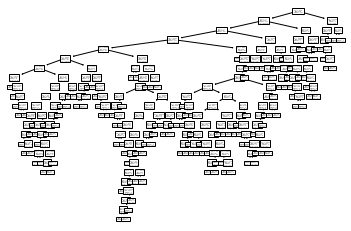

In [75]:
from sklearn.tree import plot_tree #graficamos el arbol que tiene frontera 13

plot_tree(clf);

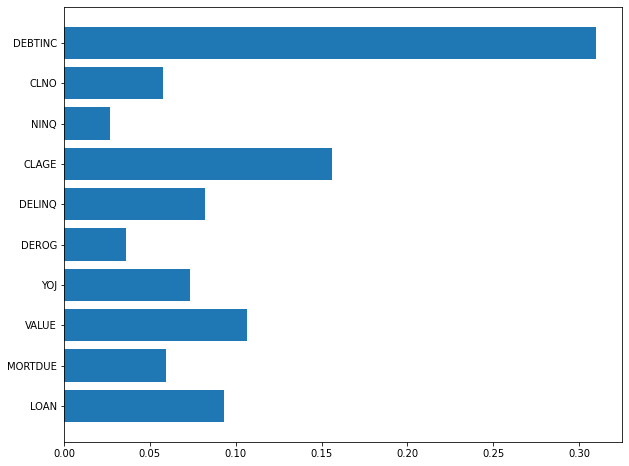

In [78]:
plt.figure(figsize=(10,8))
plt.barh(width=clf.feature_importances_,y=X.columns.values)
plt.show()

Metricas

In [79]:
from sklearn.metrics import precision_score #precision train
precision_score(y_train, y_train_pred)

1.0

In [80]:
from sklearn.metrics import precision_score #precision Test
precision_score(y_test, y_test_pred)

0.6166666666666667

In [81]:
from sklearn.metrics import recall_score
recall_score(y_train, y_train_pred) #recall train

1.0

In [82]:
from sklearn.metrics import recall_score
recall_score(y_test, y_test_pred) #recall test

0.6379310344827587

In [83]:
from sklearn.metrics import f1_score #modulos con metricas aca esta f1 train
f1_score(y_train, y_train_pred)

1.0

In [84]:
from sklearn.metrics import f1_score #modulos con metricas aca esta f1 test
f1_score(y_test, y_test_pred)

0.6271186440677966

In [85]:
confusion_matrix(y_train, y_train_pred)

array([[1232,    0],
       [   0,  251]], dtype=int64)

In [86]:
confusion_matrix(y_test, y_test_pred)

array([[290,  23],
       [ 21,  37]], dtype=int64)

### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [87]:
param_grid = {
    "criterion": ["gini", "entropy"],
    "splitter":["best", "random"],
    "max_depth":list(range(1,16)),
    "min_samples_leaf":list(range(1,6))   
}

In [88]:
model = DecisionTreeClassifier(random_state=0)

cv = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)
cv.fit(X_train, y_train);

In [89]:
result = cv.cv_results_    
df1 = pd.DataFrame(result)
df1[['param_criterion','param_splitter','param_max_depth','param_min_samples_leaf', 'mean_test_score', 'std_test_score', 'rank_test_score']]

,param_criterion,param_splitter,param_max_depth,param_min_samples_leaf,mean_test_score,std_test_score,rank_test_score
0,gini,best,1,1,0.869194,0.009254,127
1,gini,random,1,1,0.832089,0.012051,291
2,gini,best,1,2,0.869194,0.009254,127
3,gini,random,1,2,0.832089,0.012051,291
4,gini,best,1,3,0.869194,0.009254,127
...,...,...,...,...,...,...,...
295,entropy,random,15,3,0.868516,0.019381,152
296,entropy,best,15,4,0.856377,0.006142,254
297,entropy,random,15,4,0.864462,0.020632,205
298,entropy,best,15,5,0.847611,0.014919,288


In [90]:
best_model = cv.best_estimator_
cv.best_params_

{'criterion': 'gini',
 'max_depth': 11,
 'min_samples_leaf': 1,
 'splitter': 'random'}

In [91]:
y_pred = best_model.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1232
           1       0.97      0.62      0.76       251

    accuracy                           0.93      1483
   macro avg       0.95      0.81      0.86      1483
weighted avg       0.94      0.93      0.93      1483



In [92]:
confusion_matrix(y_train, y_pred)

array([[1228,    4],
       [  96,  155]], dtype=int64)

In [93]:
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.94       313
           1       0.87      0.45      0.59        58

    accuracy                           0.90       371
   macro avg       0.89      0.72      0.77       371
weighted avg       0.90      0.90      0.89       371



In [94]:
confusion_matrix(y_test, y_pred)

array([[309,   4],
       [ 32,  26]], dtype=int64)